In [1]:
# import packages

from numpy import vander, transpose, invert, array, linspace, sum, zeros, abs, concatenate
from numpy.linalg import inv
import matplotlib.pyplot as plt
from random import uniform

In [2]:
# define target function
def h_theta(theta: array, x: array):
    return transpose(theta) @ x
    
# define function that calculates the polynomial coefficients and the squared-error using the normal equations
def polynomialRegression(x_coordinates: array, y_coordinates: array, degree: int) -> array :
    max_it = 100000
    alpha = 0.00001
    theta = zeros(degree+1)
    error = zeros(max_it)
    eps = 0.0000005
    
    X = vander(x_coordinates, degree+1, increasing=True)
    y = y_coordinates
    m = len(y)
    
    for it in range(max_it):
        theta_temp = theta.copy()
        
        for j in range(degree+1):
            theta[j] = theta_temp[j] + alpha/m * sum([(y[i]-h_theta(theta_temp ,X[i]))*X[i][j] for i in range(m)])
    
        error[it] = 1/(2*x_coordinates.size) * sum(((X @ theta) - y_coordinates)**2)
        
        if sum(abs(theta_temp - theta)) < eps:
            return theta, error
            
    return theta, error

In [3]:
# number of training samples
N = 100

# random generation of training samples
x_coord = array([uniform(0,10) for _ in range(N)])
y_coord = array([uniform(0,10) for _ in range(N)])

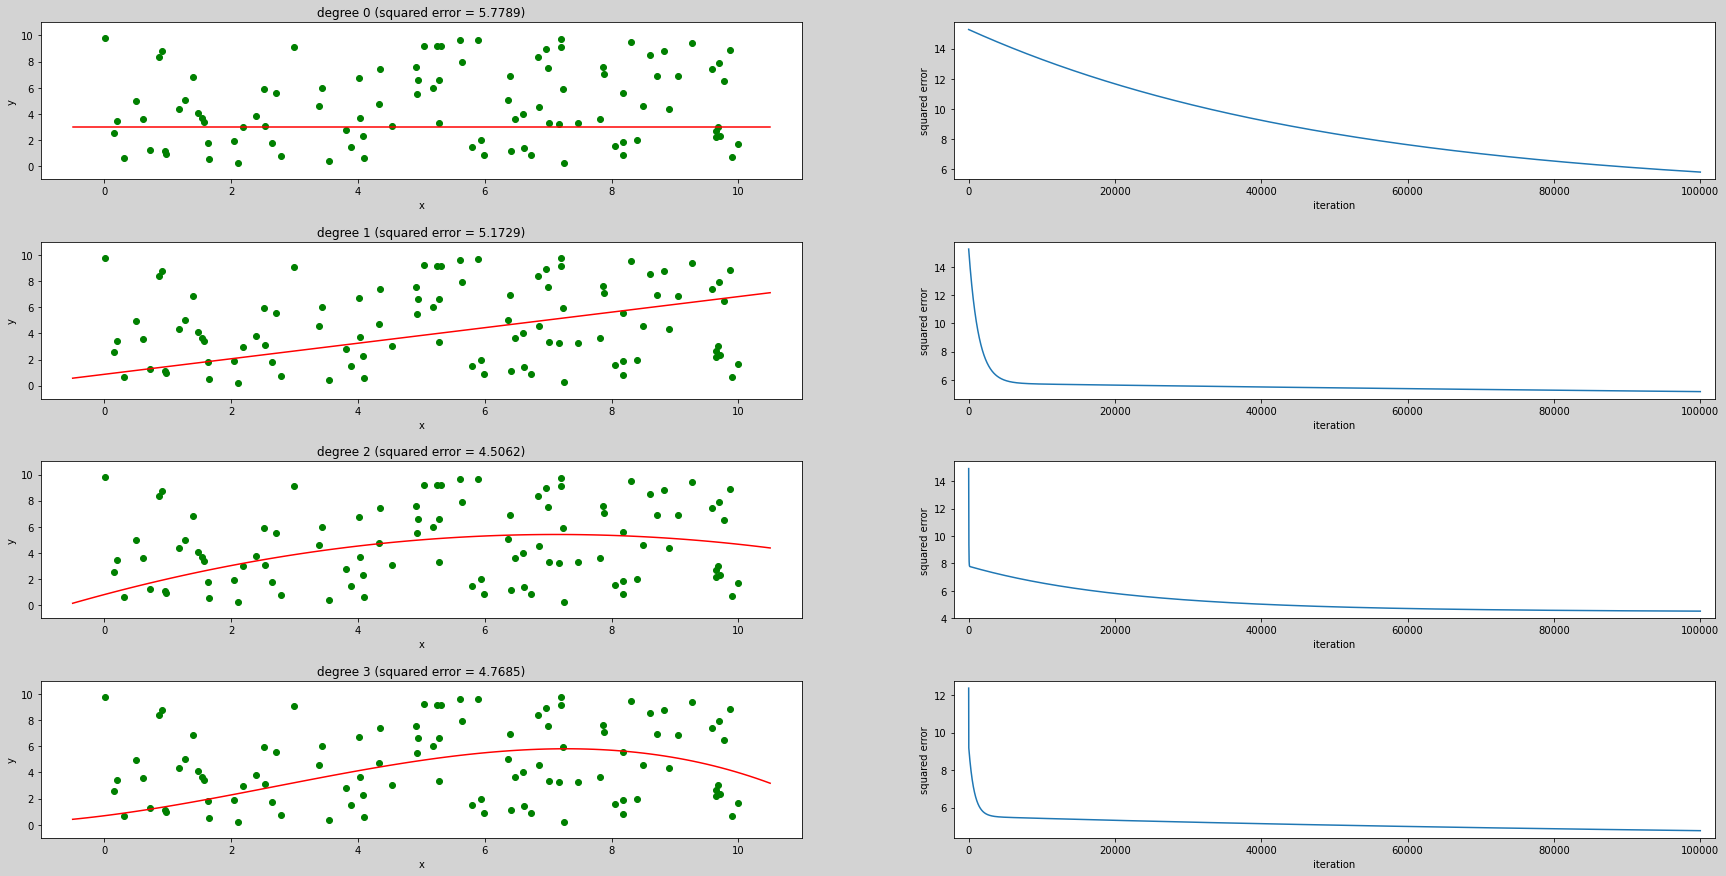

In [4]:
max_degree = 3

fig = plt.figure(figsize=(30,15), facecolor='lightgrey')

for i in range(max_degree+1):
    degree = i
    beta, error = polynomialRegression(x_coord, y_coord, degree)
    x = linspace(-0.5,10.5, 100)
    y = vander(x, degree+1, increasing=True) @ beta
    
    plt.subplot(max_degree+1,2 ,2*i+1)
    plt.title(f"degree {degree} (squared error = {round([i for i in error if i != 0][-1],4)})")
    plt.xlim(-1,11)
    plt.ylim(-1,11)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(x_coord, y_coord, color="green")
    plt.plot(x, y, color="red")
    
    plt.subplot(max_degree+1, 2, 2*i+2)
    plt.xlim(-2000,102000)
    plt.xlabel("iteration")
    plt.ylabel("squared error")
    plt.plot([i for i in error if i != 0])

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()